### Data Processing

### ML models

In [33]:
# logistic regression

In [34]:
import pandas as pd

# train data
meta_train_data = pd.read_csv('Data/train/train_metadata.csv', sep=',')
color_histogram_train = pd.read_csv('Data/train/Features/color_histogram.csv', sep=',')
hog_pca_train = pd.read_csv('Data/train/Features/hog_pca.csv', sep=',')
additional_features_train = pd.read_csv('Data/train/Features/additional_features.csv', sep=',')


In [35]:
label_train = meta_train_data["ClassId"]
label_train.head()

0    32
1    13
2     7
3     4
4    35
Name: ClassId, dtype: int64

In [36]:
data_train = additional_features_train[["edge_density", "mean_b", "mean_g", "mean_r"]]
data_train.head() 

,edge_density,mean_b,mean_g,mean_r
0,0.050293,63.748291,62.107910,62.850830
1,0.034424,48.680664,52.872314,61.539307
2,0.126709,99.174561,110.774658,127.348389
3,0.026123,30.493896,26.616211,29.006592
4,0.106934,116.836670,97.684814,79.495605


In [37]:
# decision tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


zero_r = DummyClassifier(strategy="most_frequent")
decision_tree = DecisionTreeClassifier(max_depth=10)


X_train, X_test, y_train, y_test = train_test_split(data_train, label_train, test_size=0.20)
X = meta_train_data
y = label_train

In [38]:
print('X_train: {} X_test: {} y_train: {} y_test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (4390, 4) X_test: (1098, 4) y_train: (4390,) y_test: (1098,)


In [39]:
from sklearn.metrics import accuracy_score

zero_r.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

zr_acc = accuracy_score(zero_r.predict(X_train),y_train)
dt_acc = accuracy_score(decision_tree.predict(X_train),y_train)

print('Train accuracies: \n 0-R: {} \n DT: {}'.format(zr_acc, dt_acc))

zr_acc = accuracy_score(zero_r.predict(X_test),y_test)
dt_acc = accuracy_score(decision_tree.predict(X_test),y_test)

print('Test accuracies: \n 0-R: {} \n DT: {}'.format(zr_acc, dt_acc))

Train accuracies: 
 0-R: 0.05694760820045558 
 DT: 0.3742596810933941
Test accuracies: 
 0-R: 0.05555555555555555 
 DT: 0.1575591985428051


In [40]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Train the regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
train_preds = regressor.predict(X_train)
test_preds = regressor.predict(X_test)

# Evaluation using R^2 and MSE
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train R^2: {train_r2:.4f}, MSE: {train_mse:.4f}')
print(f'Test R^2: {test_r2:.4f}, MSE: {test_mse:.4f}')


Train R^2: 0.4906, MSE: 73.5093
Test R^2: 0.0905, MSE: 131.6969


In [43]:
# try KNN and SVM

import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [44]:
print(accuracy_score(knn.predict(X_test),y_test))

0.20673952641165755


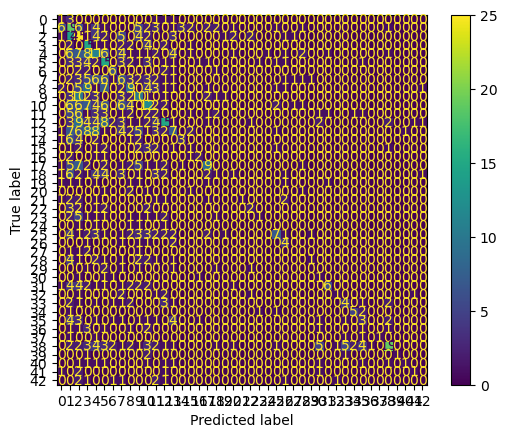

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()